In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [43]:
len(df_all)

662728

In [44]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [45]:
df_all['Term_novelty'].head()

0    0.888159
1    0.353749
2    0.855796
3    0.706213
4    0.732386
Name: Term_novelty, dtype: float64

### Logistic

In [55]:
def run_logit(df, field):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Topic_novelty',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [56]:
def run_ols(df, field):
    df = run_logit(df, field)
    df['Kudos'] = np.log(df['Kudos']+0.001)
    df['Hits'] = np.log(df['Hits']+0.001)
    df['Comments'] = np.log(df['Comments']+1)
    df['Bookmarks'] = np.log(df['Bookmarks']+0.001)
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Topic_novelty \
 + Chapters + Freq_relationship + author_fic_cnt \
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df).fit()
    return model

In [8]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')

In [38]:
df_all = df_all[['Chapters',\
        'Term_novelty', 'Topic_novelty',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
       ]]

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
for idx, name in enumerate(df_all.columns.values):
    print(name, variance_inflation_factor(df_all.values, idx))

Chapters 1.2704280292956343
Term_novelty 4.86642946656073
Topic_novelty 29.675270036321066
Freq_relationship 2.116415258986859
Category_F_M 2.033949703572282
Category_Gen 1.7559869721088366
Category_M_M 3.504609007687208
Category_Multi 1.1560913135632764
Category_Other 1.0555057800819718
Category_Unknown 1.3360963315035532
ArchiveWarnings_underage 1.1842001825165165
ArchiveWarnings_death 1.4181580646548442
ArchiveWarnings_choose_no 5.187461632627431
ArchiveWarnings_no_apply 6.313940787979179
ArchiveWarnings_violence 1.8913668943373458
author_fic_cnt 1.0402609005030006
Rating_G 2.853299497491297
Rating_M 2.2173437909470914
Rating_N 1.7655888105821727
Rating_T 3.4179053631923173


/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Fandom_dcu inf
Fandom_doctor_who inf
Fandom_star_wars 1.1723425488086205
Fandom_arthurian 1.1763714280441417
Fandom_supernatural 1.9829369079723853
Fandom_haikyuu 1.152023921960274
Fandom_kuroko_no_basuke 1.097876152195729
Fandom_hamilton_miranda 1.026172613831206
Fandom_dragon_age 1.387135235431457
Fandom_the_walking_dead 1.1353523680283664
Fandom_buffy 1.1400056685510056
Fandom_les_miserables 1.0996250517143078
Fandom_naruto 1.0947638458259552
Fandom_tolkien 1.3107078341820557
Fandom_shakespare 1.0077549102810837
Fandom_hetalia 1.1595621525263025
Fandom_attack_on_titan 1.2438621190338526
Fandom_ms_paint_adventures 1.345532082096415
Fandom_marvel 2.3258842888562437
Fandom_sailor_moon 1.018880755885226
Fandom_one_direction 1.177071818788105
Fandom_sherlock 1.8395948774149948


### Plot coefficients

In [48]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.077819
         Iterations: 35
         Function evaluations: 76
         Gradient evaluations: 72


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
ylabels =['Term novelty', 'Topic novelty', 'Chapters', \
 'Frequent relationship',' Author work count',\
 'Category (Gen)','Category (F/M)',' Category (M/M) ',' Category (Multi)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (underage)','ArchiveWarnings (death)',' ArchiveWarnings (violence)','ArchiveWarnings (choose not to use)','\
 ArchiveWarnings (non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton/Miranda)\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Tolkien)',' Fandom (Shakespare)','Fandom (Axis Powers Hetalia)',' \
 Fandom (Attack on Titan)',' Fandom (Ms Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock)'][::-1]

In [58]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.091673
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 51


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.423494
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [59]:
# fig, ax = plt.subplots(1,4,figsize = (15,15))
# ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

# ax[0].set_yticks(range(len(kudos_coef)))
# ax[0].set_yticklabels(ylabels)
# ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
# ax[0].plot(range(-8,3), [22.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,3), [26.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,3), [32.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,3), [38.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,3), [42.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[0].set_ylim(-0.5,44.5)
# ax[0].set_xlim(-4,1.5)
# ax[0].set_xlabel('Kudos', fontsize=15)
# ax[0].set_title('R-squared = 0.230')
# for tick in ax[0].yaxis.get_major_ticks():
#     tick.label.set_fontsize(13)

# ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
# ax[1].set_yticks(range(len(hits_coef)))
# # ax[1].set_yticklabels(ylabels)
# ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
# ax[1].plot(range(-8,3), [22.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,3), [26.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,3), [32.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,3), [38.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,3), [42.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
# ax[1].set_ylim(-0.5,44.5)
# ax[1].set_xlim(-5,2)
# ax[1].set_yticklabels([])
# ax[1].set_title('R-squared = 0.117')
# ax[1].set_xlabel('Hits', fontsize=15)

# ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
# ax[2].set_yticks(range(len(comments_coef)))
# ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
# ax[2].plot(range(-8,5), [22.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,5), [26.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,5), [32.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,5), [38.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,5), [42.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
# ax[2].set_ylim(-0.5,44.5)
# ax[2].set_xlim(-5,4)
# ax[2].set_yticklabels([])
# ax[2].set_title('R-squared = 0.113')
# ax[2].set_xlabel('Comments', fontsize=15)


# ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
# ax[3].set_yticks(range(len(bookmarks_coef)))
# ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
# ax[3].plot(range(-8,4), [22.5 for i in range(-8,4)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,4), [26.5 for i in range(-8,4)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,4), [32.5 for i in range(-8,4)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,4), [38.5 for i in range(-8,4)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,4), [42.5 for i in range(-8,4)] ,c='grey', alpha = 0.7)
# ax[3].set_ylim(-0.5,44.5)
# ax[3].set_xlim(-8,3)
# ax[3].set_yticklabels([])
# ax[3].set_title('R-squared = 0.238')
# ax[3].set_xlabel('Bookmarks', fontsize=15)

# plt.tight_layout()
# plt.savefig('ols_coefs_full.pdf', format='pdf')

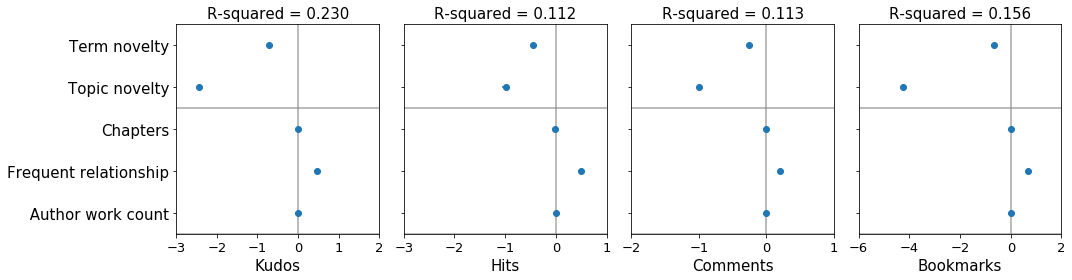

In [67]:
fig, ax = plt.subplots(1,4,figsize = (15,4))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')
# ax[0].errorbar(kudos_coef[::-1][43], 43, xerr=kudos_err[::-1][43], marker="x",c='blue')
# ax[0].errorbar(kudos_coef[::-1][43:46], range(len(kudos_coef[43:46])), xerr=kudos_err[::-1][43:46] , marker='o')
ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [21.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [25.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [30.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [36.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [39.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(36.5,41.5)
ax[0].set_xlim(-3,2)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.230', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)    

ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [39.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(36.5,41.5)
ax[1].set_xlim(-3,1)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.112', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [39.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(36.5,41.5)
ax[2].set_xlim(-2,1)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.113', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
ax[2].set_xticks([-2,-1,0,1])
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [39.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(36.5,41.5)
ax[3].set_xlim(-6,2)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared = 0.156', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[3].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
plt.tight_layout()
plt.savefig('ols_coefs_partial_ageless_nosq.pdf', format='pdf')

In [61]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     4710.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:18:49   Log-Likelihood:            -1.3155e+06
No. Observations:              662728   AIC:                         2.631e+06
Df Residuals:                  662685   BIC:                         2.632e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [62]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2000.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:18:49   Log-Likelihood:            -1.4296e+06
No. Observations:              662728   AIC:                         2.859e+06
Df Residuals:                  662685   BIC:                         2.860e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [63]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2067.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:18:49   Log-Likelihood:            -8.8059e+05
No. Observations:              662728   AIC:                         1.761e+06
Df Residuals:                  662686   BIC:                         1.762e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [64]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2906.
Date:                Fri, 14 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:18:49   Log-Likelihood:            -1.6298e+06
No. Observations:              662728   AIC:                         3.260e+06
Df Residuals:                  662685   BIC:                         3.260e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           